# Titanic Classification
Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#import the datasource as df
df = pd.read_csv('train.csv')

In [3]:
# print the first five lines of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#shape of the dataset
df.shape

(891, 12)

dataset shows 891 rows and 12 columns


In [5]:
#Printing the column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Lets more describe the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Lets check number of unique values in each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
#Lets find the null values in the dataset
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

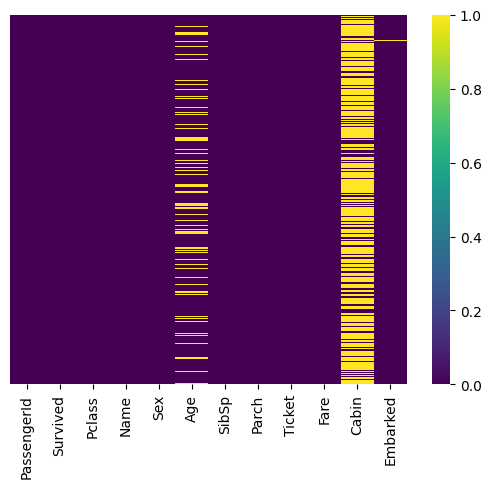

In [10]:
sns.heatmap(df.isnull(),yticklabels = False, cmap = 'viridis')

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Lets calculate the percentage of these null values
round(((df.isnull().sum())/891)*100)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

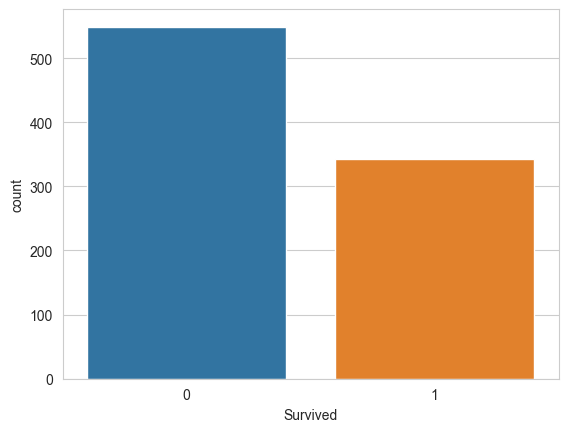

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df)

In [14]:
(df['Survived']).value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Above Plot and calculation depicts that out of 891 passangers 549 are survived and 342 have died.

In [15]:
Total_survival_rate = (549/891)*100
Total_survival_rate

61.61616161616161

In [16]:
Total_death_rate = (342/891)*100
Total_death_rate

38.38383838383838

<Axes: xlabel='Survived', ylabel='count'>

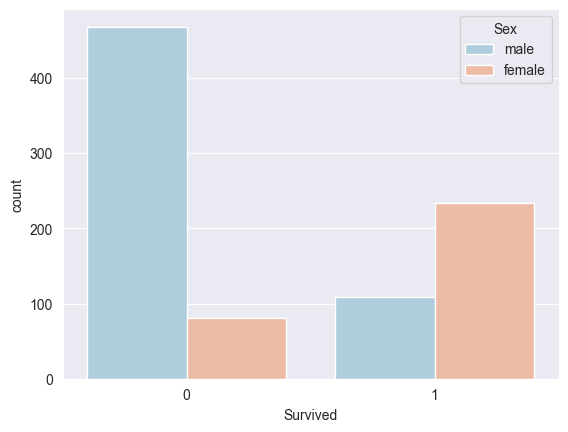

In [17]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'RdBu_r')

## Above bargraph represents that female have more survival rate than males.

<Axes: xlabel='Survived', ylabel='count'>

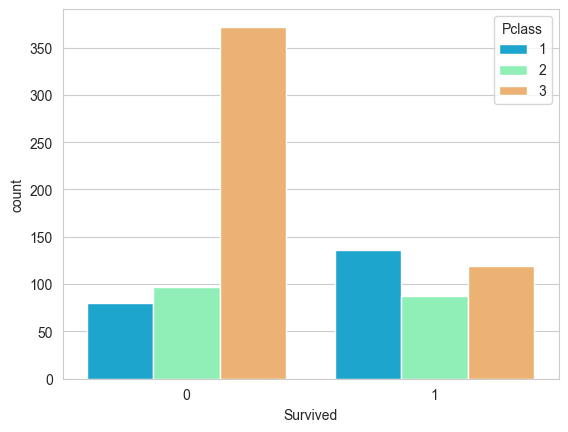

In [18]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue= 'Pclass', data = df, palette = 'rainbow')

## Passanger Class 1 has more survival rate than Passanger classes 2 and 3.

<Axes: xlabel='Age'>

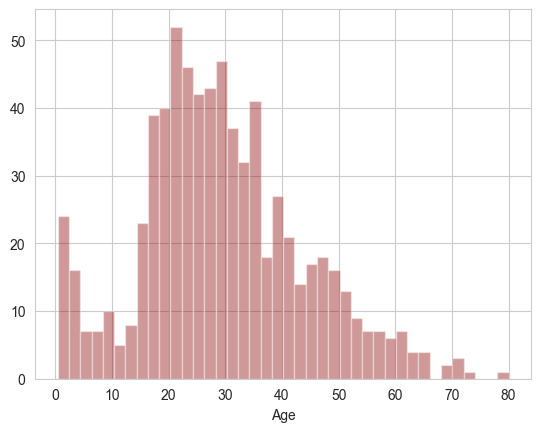

In [19]:
sns.distplot(df['Age'].dropna(), bins = 40, kde = False, color = 'darkred')

In [20]:
plt.figure(figsize = (12,10))

bins = [0, 9, 19, 29, 39, 49, 59, 69, 100]

labels = ['0-9', '10-19', '20-29', '30-39','40-49','50-59','60-69','70+']
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

Survival_rate_by_AgeGroup = df.groupby('AgeGroup')['Survived'].mean()
print("Survival Rate by Agegroup " , Survival_rate_by_AgeGroup)

Survival Rate by Agegroup  AgeGroup
0-9      0.666667
10-19    0.400000
20-29    0.346667
30-39    0.439306
40-49    0.360825
50-59    0.461538
60-69    0.285714
70+      0.142857
Name: Survived, dtype: float64


<Figure size 1200x1000 with 0 Axes>

<Axes: xlabel='Survived', ylabel='count'>

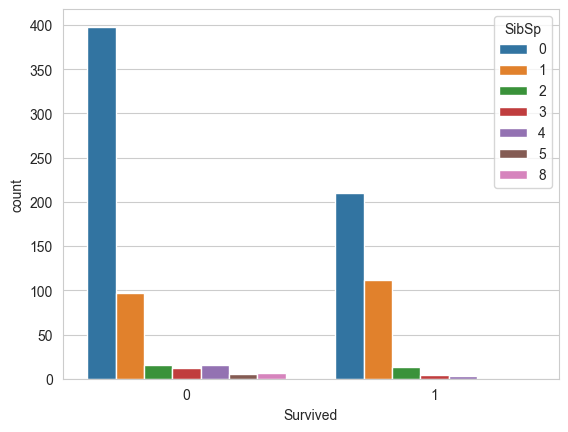

In [21]:
sns.countplot(x = 'Survived',hue = 'SibSp', data= df)

In [22]:
## From above barchart it is clear that Survival rate does not depend upon 'SibSp' column.

<Axes: xlabel='Survived', ylabel='count'>

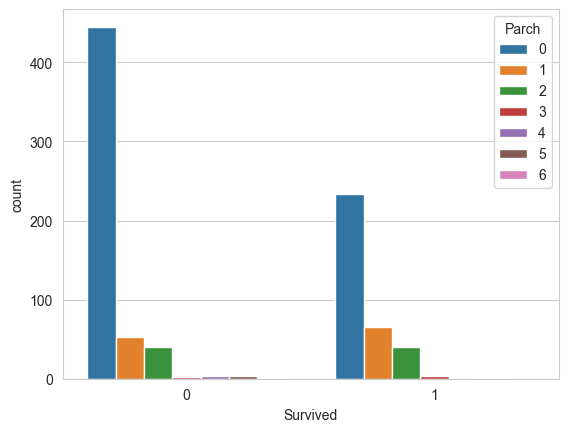

In [23]:
sns.countplot(x = 'Survived',hue = 'Parch', data= df)

<Axes: xlabel='Survived', ylabel='count'>

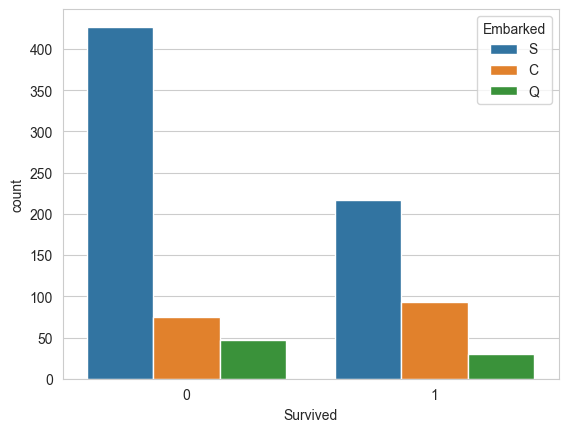

In [24]:
sns.countplot(x = 'Survived',hue = 'Embarked', data= df)

In [25]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

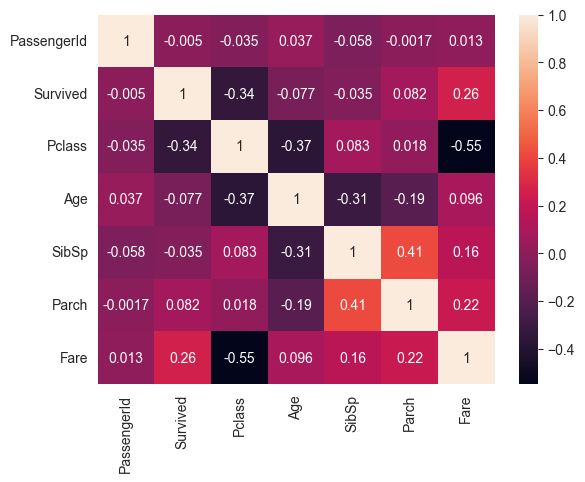

In [26]:
sns.heatmap(df.corr(), annot = True)

In [27]:
import pandas as pd
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
print(contingency_table)

Survived    0    1
Sex               
female     81  233
male      468  109


## Null value imputation
### After studying above correlation map we can conclude that there is a relation between Age and Pclass, we use this relation for imputation of Nan values

<Axes: xlabel='Pclass', ylabel='Age'>

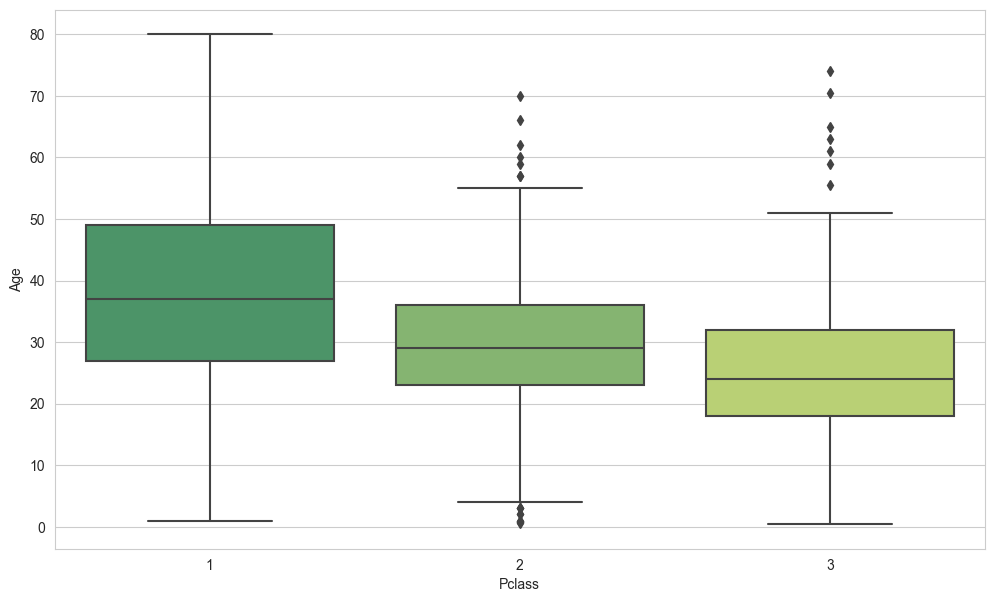

In [28]:
#Let's first plot a boxplot
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'summer')

In [29]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass== 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [30]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis = 1)

In [31]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64

In [32]:
df.drop('AgeGroup', axis = 1,inplace = True)

In [33]:
df.drop('Cabin', axis = 1, inplace = True)

In [34]:
df.shape

(891, 11)

In [35]:
df['Embarked'].fillna(df['Embarked'].mode, inplace = True)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [38]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
Embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [39]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1 , inplace = True)

In [40]:
df.shape

(891, 7)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [42]:
df= pd.concat([df, sex, Embark], axis=1)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [44]:
X = df.drop('Survived', axis = 1)
y = df['Survived']
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,0,1


In [45]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
X.shape

(891, 10)

In [47]:
y.shape

(891,)

In [48]:
y.dtype

dtype('int64')

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [53]:
predictions = logmodel.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[134,  23],
       [ 35,  76]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7835820895522388

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8059701492537313
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

[[135  22]
 [ 30  81]]


In [59]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

# Conclusion
## Factors that most affects on the Survival are 
1. Passangers from class 1 have larger survival rate and 
2. Females from all passangers have large survival rate.
1. Out of 891 passangers 549 are survived and 342 have died.
2. Total Survival rate is 61.62 % and rate of deaths is 38.38%.

In [60]:
pip install joblib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import joblib

In [64]:
joblib.dump(model, 'titanic_survival_model.pkl')

['titanic_survival_model.pkl']

In [87]:

def predict_survival(input_data):
    # Load the model
    model = joblib.load('titanic_survival_model.pkl')

    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data])

    # Make the prediction
    prediction = model.predict(input_df)
    
    return 'Survived' if prediction[0] else 'Did not survive'

# Example usage
input_data = {
    'PassengerId': 1,
    'Pclass': 3,
    'Age': 22.0,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.2500,
    'male': 1,
    'C': 0,
    'Q': 0,
    'S': 1
}

In [88]:
print(predict_survival(input_data))

Did not survive
